<a href="https://colab.research.google.com/github/KSeungBin/python/blob/master/function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 알바생 A or B

In [2]:
days = 30

A = np.array([3000000 for i in range(days)])
print(f"{np.sum(A):,d}")

90,000,000


In [3]:
B = np.array([2**i for i in range(days)])
print(f"{np.sum(B):,d}")

1,073,741,823


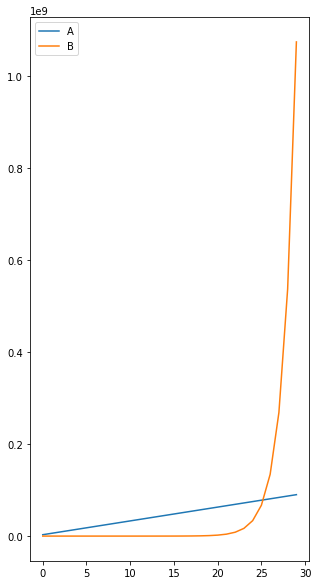

In [4]:
# 지수적 증가 = 기하급수적 증가 (임계포인트를 넘어서는 순간 폭발적 증가)
fig = plt.figure(figsize=(5,10))
ax = plt.axes()

ax.plot(range(days), np.cumsum(A), label='A')
ax.plot(range(days), np.cumsum(B), label='B')
ax.legend()

plt.show()

## MSE vs MSLE

In [5]:
gt_1 = 10
pred_1 = 15

gt_2 = 1000
pred_2 = 1005

def mse(pred, gt):
    return (pred - gt)**2

def msle(pred, gt):
    return (np.log(pred+1) - np.log(gt+1))**2

print(f"mse 1:{mse(pred_1, gt_1):.6f}")
print(f"mse 2:{mse(pred_2, gt_2):.6f}")

print(f"msle 1:{msle(pred_1, gt_1):.6f}")
print(f"msle 2:{msle(pred_2, gt_2):.6f}")

mse 1:25.000000
mse 2:25.000000
msle 1:0.140395
msle 2:0.000025


## 2 변수 스칼라 함수 시각화

In [6]:
from ipywidgets import interact
import ipywidgets as widgets

In [7]:
# bar를 늘리면 grid point가 늘어나면서(interactive), 이변수 스칼라함수를 곡면 상의 그림으로 나타낼 수 있다.
@interact( x=widgets.IntSlider(min=2, max=20, step=1, value=2) )
def draw_func(x):
    fig = plt.figure(figsize=(7,7))
    ax = plt.axes(projection='3d')

    ax.xaxis.set_tick_params(labelsize=15)
    ax.yaxis.set_tick_params(labelsize=15)
    ax.zaxis.set_tick_params(labelsize=15)
    ax.set_xlabel(r'$x_1$', fontsize=20)
    ax.set_ylabel(r'$x_2$', fontsize=20)
    ax.set_zlabel(r'$z$', fontsize=20)

    x1 = np.linspace(-2, 2, x)
    x2 = np.linspace(-1, 3, x)
    X1, X2 = np.meshgrid(x1, x2)
    Z = 50*(X2 - X1**2)**2 + (2-X1)**2

    # ax.scatter3D(X1, X2, Z, marker='.', color='C1')
    ax.plot_surface(X1, X2, Z, cmap=plt.cm.binary, edgecolor="k")

    plt.show()

interactive(children=(IntSlider(value=2, description='x', max=20, min=2), Output()), _dom_classes=('widget-int…